In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [89]:
X,y = make_regression(n_samples=4, n_features=1,n_informative=1,n_targets=1,noise=100,random_state=13)

In [90]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [91]:
m = lr.coef_
b = lr.intercept_
print('m is ::: ',m)
print('b is ::: ',b)

m is :::  [82.71223428]
b is :::  32.69954105391578


In [92]:
y_pred = m*X + b

In [93]:
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

# Gradient Descent 

In [94]:
m = lr.coef_
b = 0
eta = 0.1

epochs = 18

* with a good learning rate (0.1) - don't need much epochs

In [95]:
for i in range(epochs):
    slope_loss = -2*np.sum(y-m*X.ravel()-b)
    step = eta*slope_loss
    b = b-step
    
    y_pred = m*X+b
    
    plt.plot(X,y_pred)
    print('b is currently :::: ',b)
plt.scatter(X,y)


b is currently ::::  26.159632843132627
b is currently ::::  31.391559411759147
b is currently ::::  32.43794472548445
b is currently ::::  32.64722178822951
b is currently ::::  32.68907720077852
b is currently ::::  32.697448283288324
b is currently ::::  32.699122499790285
b is currently ::::  32.69945734309068
b is currently ::::  32.69952431175076
b is currently ::::  32.699537705482776
b is currently ::::  32.69954038422918
b is currently ::::  32.69954091997846
b is currently ::::  32.69954102712831
b is currently ::::  32.69954104855828
b is currently ::::  32.699541052844275
b is currently ::::  32.69954105370147
b is currently ::::  32.69954105387291
b is currently ::::  32.699541053907204


* with a small learning rate - causing larger number of epochs

In [96]:
m = lr.coef_
b = 0
eta = 0.01

epochs = 180

for i in range(epochs):
    slope_loss = -2*np.sum(y-m*X.ravel()-b)
    step = eta*slope_loss
    b = b-step
    
    y_pred = m*X+b
    
    plt.plot(X,y_pred)
    print('b is currently :::: ',b)
plt.scatter(X,y)

b is currently ::::  2.6159632843132625
b is currently ::::  5.022649505881464
b is currently ::::  7.23680082972421
b is currently ::::  9.273820047659536
b is currently ::::  11.147877728160035
b is currently ::::  12.872010794220493
b is currently ::::  14.458213214996116
b is currently ::::  15.917519442109688
b is currently ::::  17.260081171054175
b is currently ::::  18.495237961683102
b is currently ::::  19.631582209061715
b is currently ::::  20.67701891665004
b is currently ::::  21.638820687631302
b is currently ::::  22.52367831693406
b is currently ::::  23.337747335892598
b is currently ::::  24.08669083333445
b is currently ::::  24.775718850980958
b is currently ::::  25.409624627215745
b is currently ::::  25.99281794135175
b is currently ::::  26.52935579035687
b is currently ::::  27.022970611441583
b is currently ::::  27.47709624683952
b is currently ::::  27.89489183140562
b is currently ::::  28.27926376920643
b is currently ::::  28.632885951983177
b is current

* with a large learning rate - causing no convergence 

In [97]:
m = lr.coef_
b = 0
eta = 0.3

epochs = 10

for i in range(epochs):
    slope_loss = -2*np.sum(y-m*X.ravel()-b)
    step = eta*slope_loss
    b = b-step
    
    y_pred = m*X+b
    
    plt.plot(X,y_pred)
    print('b is currently :::: ',b)
plt.scatter(X,y)

b is currently ::::  78.47889852939787
b is currently ::::  -31.391559411759133
b is currently ::::  122.42708170586066
b is currently ::::  -92.91901585880704
b is currently ::::  208.56552073172776
b is currently ::::  -213.51283049502103
b is currently ::::  377.3968612224272
b is currently ::::  -449.87670718200013
b is currently ::::  708.3062885841981
b is currently ::::  -913.1499054884797


## Gradient Descent formulation Class fitting only 'b'

In [98]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [99]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

In [100]:
plt.scatter(X,y)

In [101]:
lr= LinearRegression()
lr.fit(X,y)

LinearRegression()

In [102]:
m = lr.coef_
b = lr.intercept_
m , b

(array([13.00096443]), 2.356272948299911)

In [103]:
class GDRegression :
    
    def __init__(self,learning_rate,epochs):
        self.m = m
        self.b = 0
        self.eta = learning_rate
        self.iter = epochs
    
    def fit(self,X,y):
        for i in range(self.iter):
            slope_loss = -2 * np.sum(y - (self.m * X) - self.b)
            step = self.eta * slope_loss
            self.b = self.b - step
        print(self.b)        

In [104]:
learning_rate = 0.00001
epochs = 100

In [105]:
lr = GDRegression(learning_rate,epochs)

In [106]:
lr.fit(X,y)

2.3562729478199294


In [107]:
coeff = lr.b
coeff

2.3562729478199294

# Gradient Descent complete formulation Class

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [111]:
X,y = make_regression(n_samples=1000,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

<IPython.core.display.Javascript object>


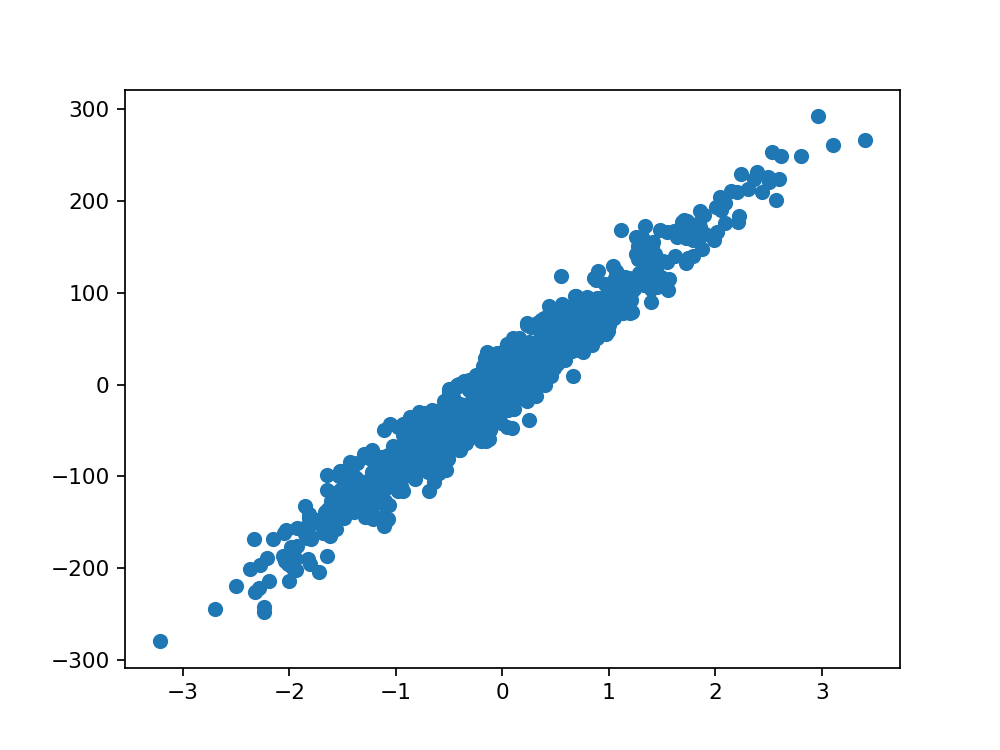

In [112]:
plt.scatter(X,y)

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [115]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('r2_score ::: ',r2_score(y_test,y_pred))
print('slope ::: ',lr.coef_)
print('intercept ::: ',lr.intercept_)

r2_score :::  0.9586262587330123
slope :::  [89.15929199]
intercept :::  0.5798269647558696


In [202]:
initial_b = -50
initial_m = 130
class GDRegression :
    
    def __init__(self,learning_rate,epochs):
        self.b = initial_b
        self.m = initial_m
        self.eta = learning_rate
        self.iter = epochs
        
    def fit(self,X,y):
        slope_loss_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
        step_b = self.eta * slope_loss_b
        self.b = self.b - step_b
        slope_loss_m = -2 * np.sum((y - self.m * X.ravel() - self.b)*X.ravel())
        step_m = self.eta * slope_loss_m
        self.m = self.m - step_m
        return(self.m,self.b)
    
    def predict(self,X):
        y_pred = self.m * X + self.b
        return y_pred

In [305]:
learning_rate = 0.00061
epochs = 1000

In [306]:
lr = GDRegression(learning_rate,epochs)

In [307]:
lr.fit(X_train,y_train)

(92.11415635522397, 0.5748908971882329)

In [308]:
y_pred = lr.predict(X_test)

In [309]:
print('r2_score ::: ',r2_score(y_test,y_pred))
print('slope ::: ',lr.m)
print('intercept ::: ',lr.b)

r2_score :::  0.9597564224263655
slope :::  92.11415635522397
intercept :::  0.5748908971882329
